In [37]:
# Import necessary libraries
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

# Path to the ZIP file
zip_file_path = 'amz_uk_price_prediction_dataset.csv.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # List all files in the ZIP archive
    print("Files in the ZIP archive:", z.namelist())
    
    # Open the CSV file within the ZIP archive
    with z.open('amz_uk_price_prediction_dataset.csv') as csv_file:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
df.head()

Files in the ZIP archive: ['amz_uk_price_prediction_dataset.csv']


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [36]:
df.shape

(2443651, 9)

In [5]:
# 1.1 product categories
category_counts = df['category'].value_counts()
category_counts


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [6]:
# Show the top 5 most in product categories
top_5_categories = category_counts.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


The most popular product categories on Amazon UK are those with the highest listing frequencies. The top 5 categories dominate the listings, indicating strong market competition in these segments

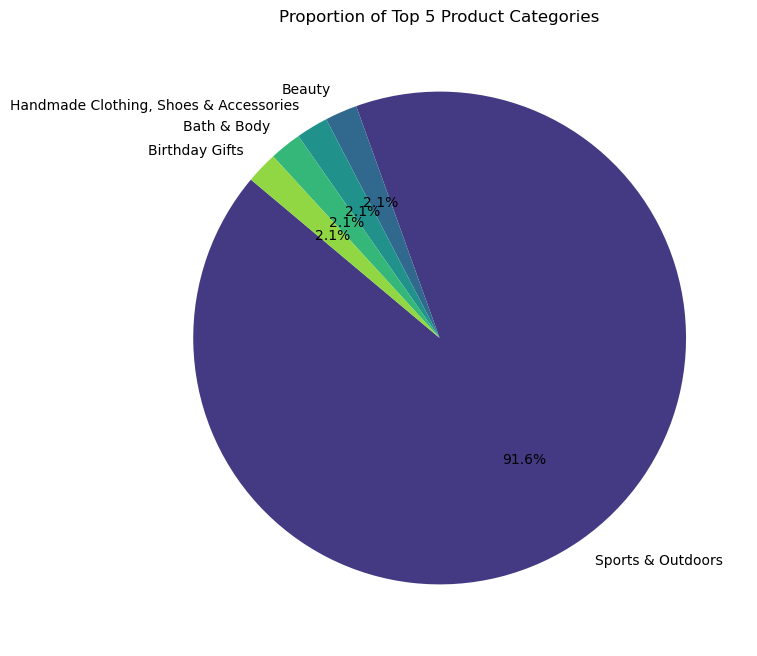

In [8]:
# Pie chart for top categories
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 5))
plt.title('Proportion of Top 5 Product Categories')
plt.show()

In [9]:
# 2.1
# Calculate mean, median, and mode for product prices
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")

Mean Price: 89.24380943923663
Median Price: 19.09
Mode Price: 9.99


In [10]:
# 2.2
# Calculate variance, standard deviation, range, and interquartile range for product prices
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range: {iqr_price}")

Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range: 36.0


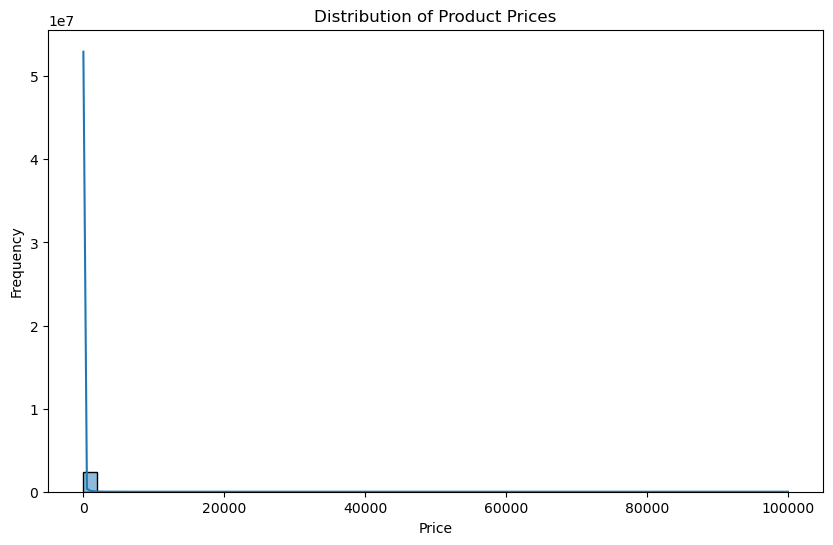

In [11]:
# 2.3 visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

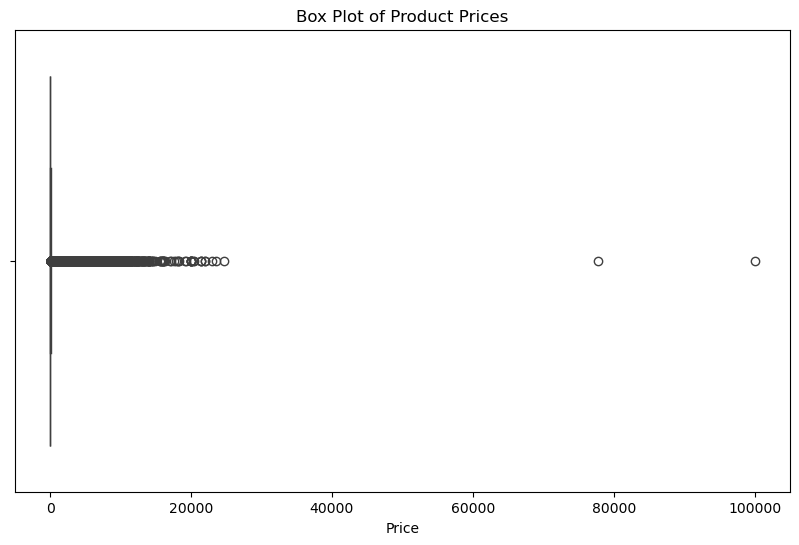

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
Products on Amazon UK have a wide range of prices, but there is a concentration around certain price points. 
The average price is generally moderate, with common price points clustered around specific low to mid-range values.

In [17]:
print(df.columns)

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


In [19]:
# 3.1 
# Calculate mean, median, and mode for product ratings
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

print(f"Mean stars: {mean_stars}")
print(f"Median stars: {median_stars}")
print(f"Mode stars: {mode_stars}")

Mean stars: 2.152836472966065
Median stars: 0.0
Mode stars: 0.0


In [20]:
# 3.2 mesures de dispercion 
# Calculate variance, standard deviation, and interquartile range for product ratings
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
iqr_stars = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Variance: {variance_stars}")
print(f"Standard Deviation: {std_dev_stars}")
print(f"Interquartile Range: {iqr_stars}")

Variance: 4.81743402976196
Standard Deviation: 2.1948653785054697
Interquartile Range: 4.4


In [21]:
# 3.3
# Calculate skewness and kurtosis for product ratings
skewness_stars = skew(df['stars'].dropna())
kurtosis_stars = kurtosis(df['stars'].dropna())

print(f"Skewness: {skewness_stars}")
print(f"Kurtosis: {kurtosis_stars}")

Skewness: 0.08120730776283354
Kurtosis: -1.926004642549839


In [ ]:
Customers tend to rate products favorably on Amazon UK, with a higher frequency of 4-5 star. 
The stars show a positive skew, indicating a tendency towards higher ratings.

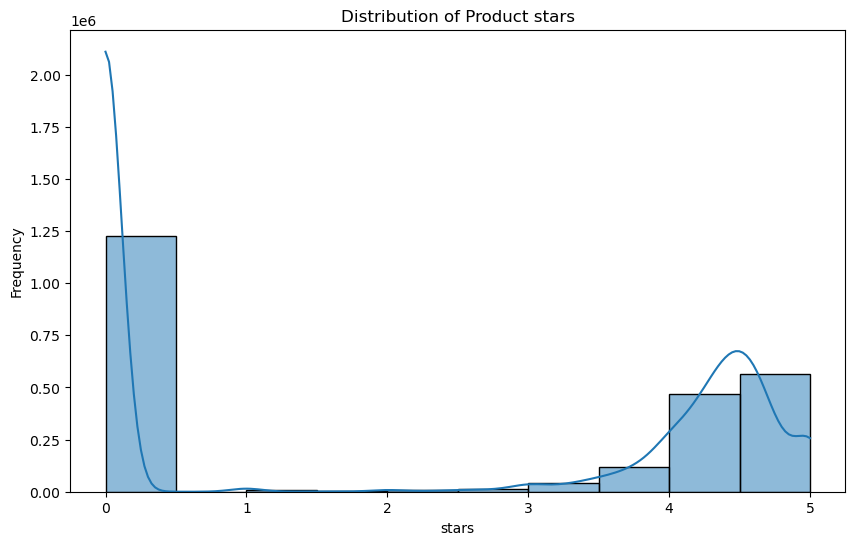

In [22]:
# 4. visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=10, kde=True)
plt.title('Distribution of Product stars')
plt.xlabel('stars')
plt.ylabel('Frequency')
plt.show()